In [2]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull, convex_hull_plot_2d

In [3]:
img = cv2.imread('spot.png', cv2.IMREAD_GRAYSCALE) # считываем картинку

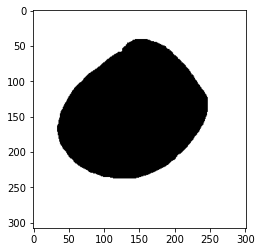

In [4]:
plt.imshow(img, cmap='gray')

In [5]:
print("Высота:"+str(img.shape[0]))
print("Ширина:" + str(img.shape[1]))
a = img.shape[0]
b = img.shape[1]
c = int(math.sqrt(a**2 + b**2))

Высота:308
Ширина:301


Центральные направления

In [6]:
center_line = int(img.shape[0]) // 2 # центральная строка
center_column = int(img.shape[1]) // 2 # центральный столбец

### Эксперимент с горизонтальным направлением
Рассмотрим отдельно центральную строку изображения. Выведем ее значения, затем вычислим градиент и убедимся на графиках, что рисутствуют 2 пика.

In [7]:
s = np.array(list(map(int, img[center_line]))) 
print(s)

[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0 255 255 255 25

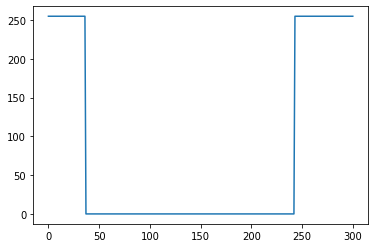

In [8]:
x = np.arange(img.shape[1]) # размер строки
y = s
plt.figure()
plt.plot(x, y)
plt.show()

Строим градиент и видим 2 пика

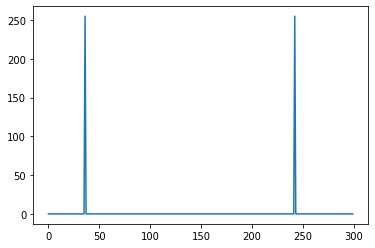

In [9]:
grad = np.zeros(img.shape[1] - 1)
for i in range(img.shape[1] - 1):
    grad[i] = abs(y[i+1] - y[i])
plt.figure()
plt.plot(x[:img.shape[1] - 1], grad)
plt.show()

### Общий случай
Сначала задаем кол-во направлений, затем вычисляем по ним градиенты яркости как в предыдущем примере и отмечаем точки пиков на изображении. Потом соединяем полученные точки и имеем примерные границы пятна.

Функция, которая возвращает массив значений яркости и координаты по заданному углом направлению

In [70]:
def brightness_by_direction(alpha, img):  
    # массив для яркости
    res = np.zeros(c)
    res.fill(255)
    # массив для координат
    coordinates = np.zeros((2, c))
    # координаты известной точки
    x_0 = center_line
    y_0 = center_column
    # направление
    a_x = - math.sin(alpha)
    a_y = math.cos(alpha)
    # случай горизонтального направления
    if alpha == 0:
        res = img[x_0, :]
        coordinates[0] = x_0
        coordinates[1] = np.arange(c)
        return res, coordinates
    # поиск пределов t
    if alpha > math.pi / 2:
        t_1 = math.ceil(max((a - x_0) / a_x, (b - y_0) / a_y)) 
        t_2 = math.floor(min(- x_0 / a_x, - y_0 / a_y)) 
    else:
        t_1 = math.ceil(max((a - x_0) / a_x, - y_0 / a_y)) 
        t_2 = math.floor(min(- x_0 / a_x, (b - y_0) / a_y)) 
    # проход по изображению
    i = 0
    for t in range(t_1 + 1, t_2 - 1):
        x = int(x_0 + a_x * t)
        y = int(y_0 + a_y * t)
        coordinates[0, i] = x
        coordinates[1, i] = y
        i += 1
        res[i] = img[x, y]
        
    return res, coordinates

2
[  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 127.5 127.5   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   

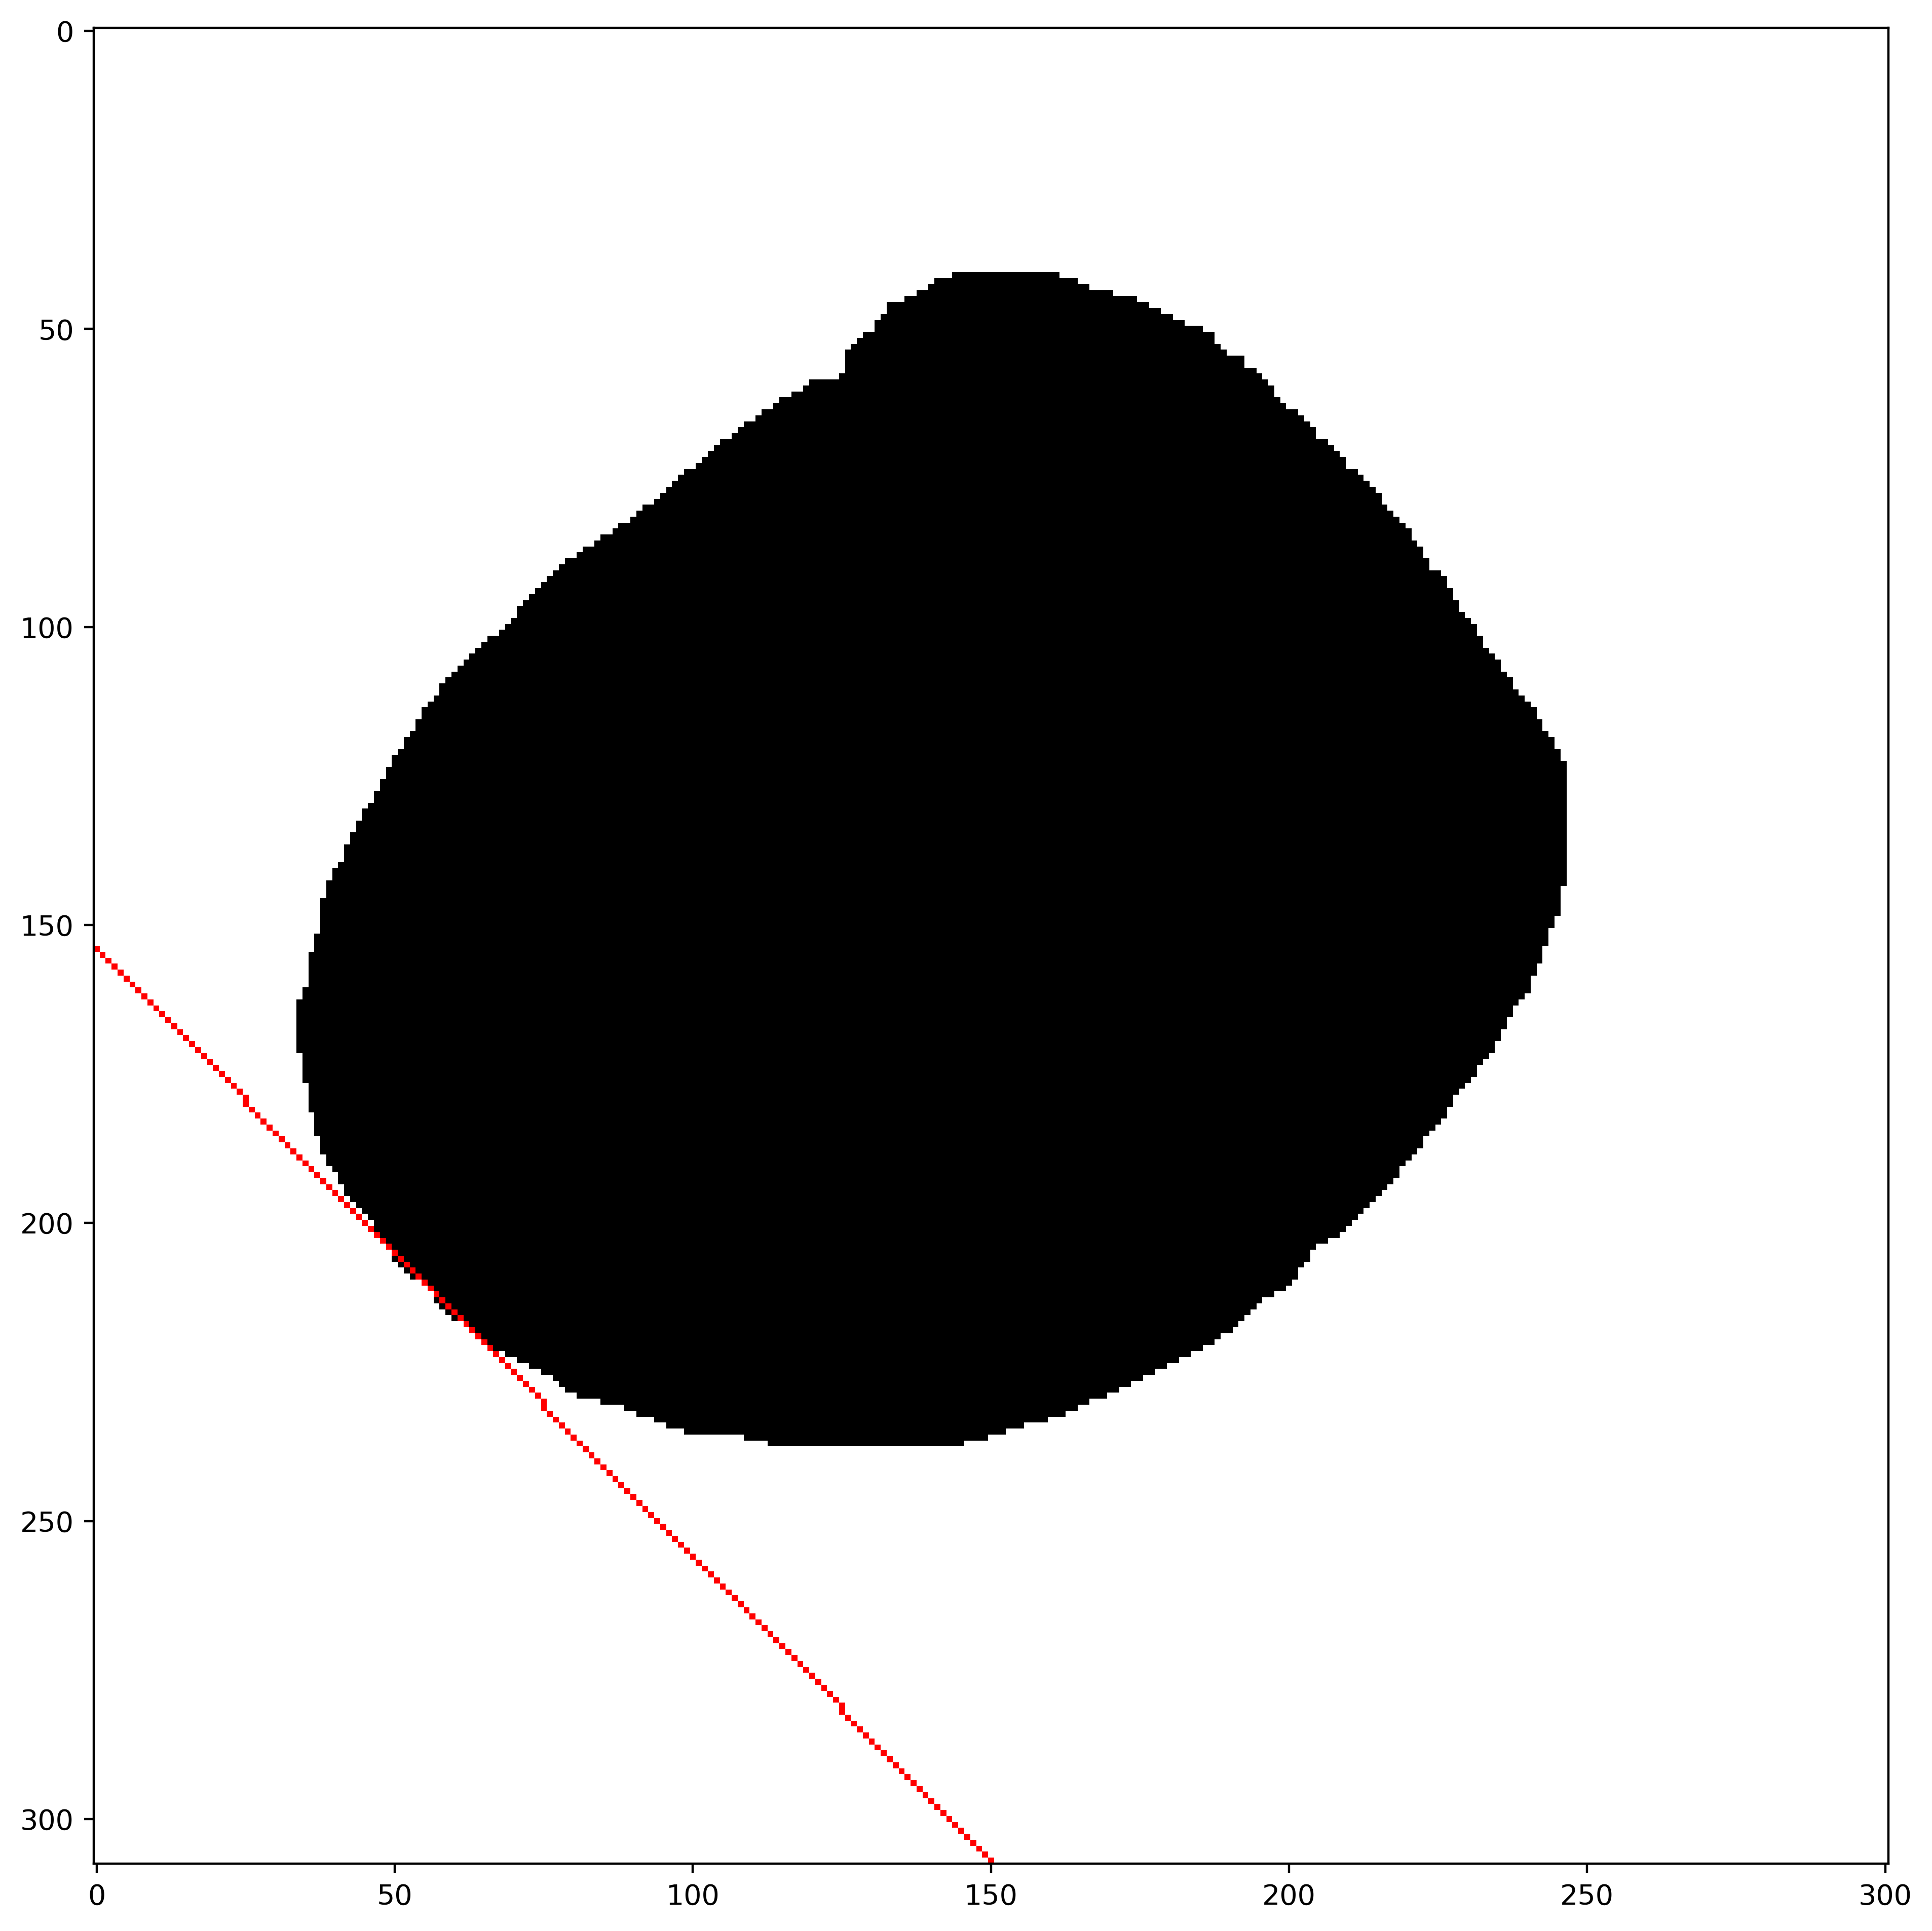

In [74]:
res = cv2.imread('spot.png', cv2.IMREAD_COLOR) # здесь будет сегментрованное изображение

n = int(input()) # кол-во прямых-направлений
points = np.zeros((2, n * 2)) # массив для координат точек, которые мы будем соединять

for i in range(n):
    alpha = i * math.pi / n # угол направления с горизонталью
    bright, coordinates = brightness_by_direction(alpha, img)
    
    size = bright.size
    grad = np.gradient(bright)
    grad = np.absolute(grad)
#     grad = np.zeros(size - 1)
#     for j in range(size - 1):
#         grad[j] = abs(int(bright[j+1]) - int(bright[j]))
    print(grad)
    
    # ПЕРЕДЕЛАТЬ: НАХОДИМ ВСЕ ЛОК МАКСИМУМЫ И ВЫБИРАЕМ НАИБОЛЬШИЕ
    # будем искать локальные максимумы по условию: градиент в данной точке больше, чем в предыдущей
    # хотя бы на 50 и больше, чем в следующей хотя бы на 50
    first = 0
    last = 0
    for j in range(1, size - 1):
        if grad[j] > (grad[j-1] + 50) and grad[j] > (grad[j+1] + 50):
            if first > 0:
                last = j
            else:
                first = j
                
    # i-я точка
    points[1, i] = int(coordinates[0, first])
    points[0, i] = int(coordinates[1, first])
    # n+i-я точка
    points[1, n + i] = int(coordinates[0, last])
    points[0, n + i] = int(coordinates[1, last])

for i in range(1, 2 * n):

    lineThickness = 1
    points = points.astype(np.int32)

    x_1 = points[0, i - 1]
    y_1 = points[1, i - 1]
    x_2 = points[0, i]
    y_2 = points[1, i]
    cv2.line(res, (x_1, y_1), (x_2, y_2), (255,0,0), lineThickness) 

cv2.line(res, (x_2, y_2), (points[0, 0], points[1, 0]), (255,0,0), lineThickness)

plt.figure(figsize=(18, 12), dpi=400)
plt.imshow(res)

### Теперь попробуем сделать то же самое, но с применением Sobel фильтра

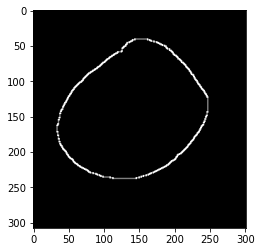

In [58]:
scale = 1
delta = 0
ddepth = cv2.CV_16S
gray = cv2.imread('spot.png', cv2.IMREAD_GRAYSCALE) # считываем картинку
grad_x = cv2.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)
grad_img = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
plt.figure()
plt.imshow(grad_img, cmap = 'gray')

In [64]:
def grad_by_direction(alpha, img):  
    # массив для градиента
    res = np.zeros(c)
    res.fill(0)
    # массив для координат
    coordinates = np.zeros((2, c))
    # координаты известной точки
    x_0 = center_line
    y_0 = center_column
    # направление
    a_x = - math.sin(alpha)
    a_y = math.cos(alpha)
    # случай горизонтального направления
    if alpha == 0:
        res = grad_img[x_0, :]
        coordinates[0] = x_0
        coordinates[1] = np.arange(c)
        return res, coordinates
    # поиск пределов t
    if alpha > math.pi / 2:
        t_1 = math.ceil(max((a - x_0) / a_x, (b - y_0) / a_y)) 
        t_2 = math.floor(min(- x_0 / a_x, - y_0 / a_y)) 
    else:
        t_1 = math.ceil(max((a - x_0) / a_x, - y_0 / a_y)) 
        t_2 = math.floor(min(- x_0 / a_x, (b - y_0) / a_y)) 
    # проход по изображению
    i = 0
    for t in range(t_1 + 1, t_2 - 1):
        x = int(x_0 + a_x * t)
        y = int(y_0 + a_y * t)
        coordinates[0, i] = x
        coordinates[1, i] = y
        i += 1
        res[i] = grad_img[x, y]
        
    return res, coordinates

4


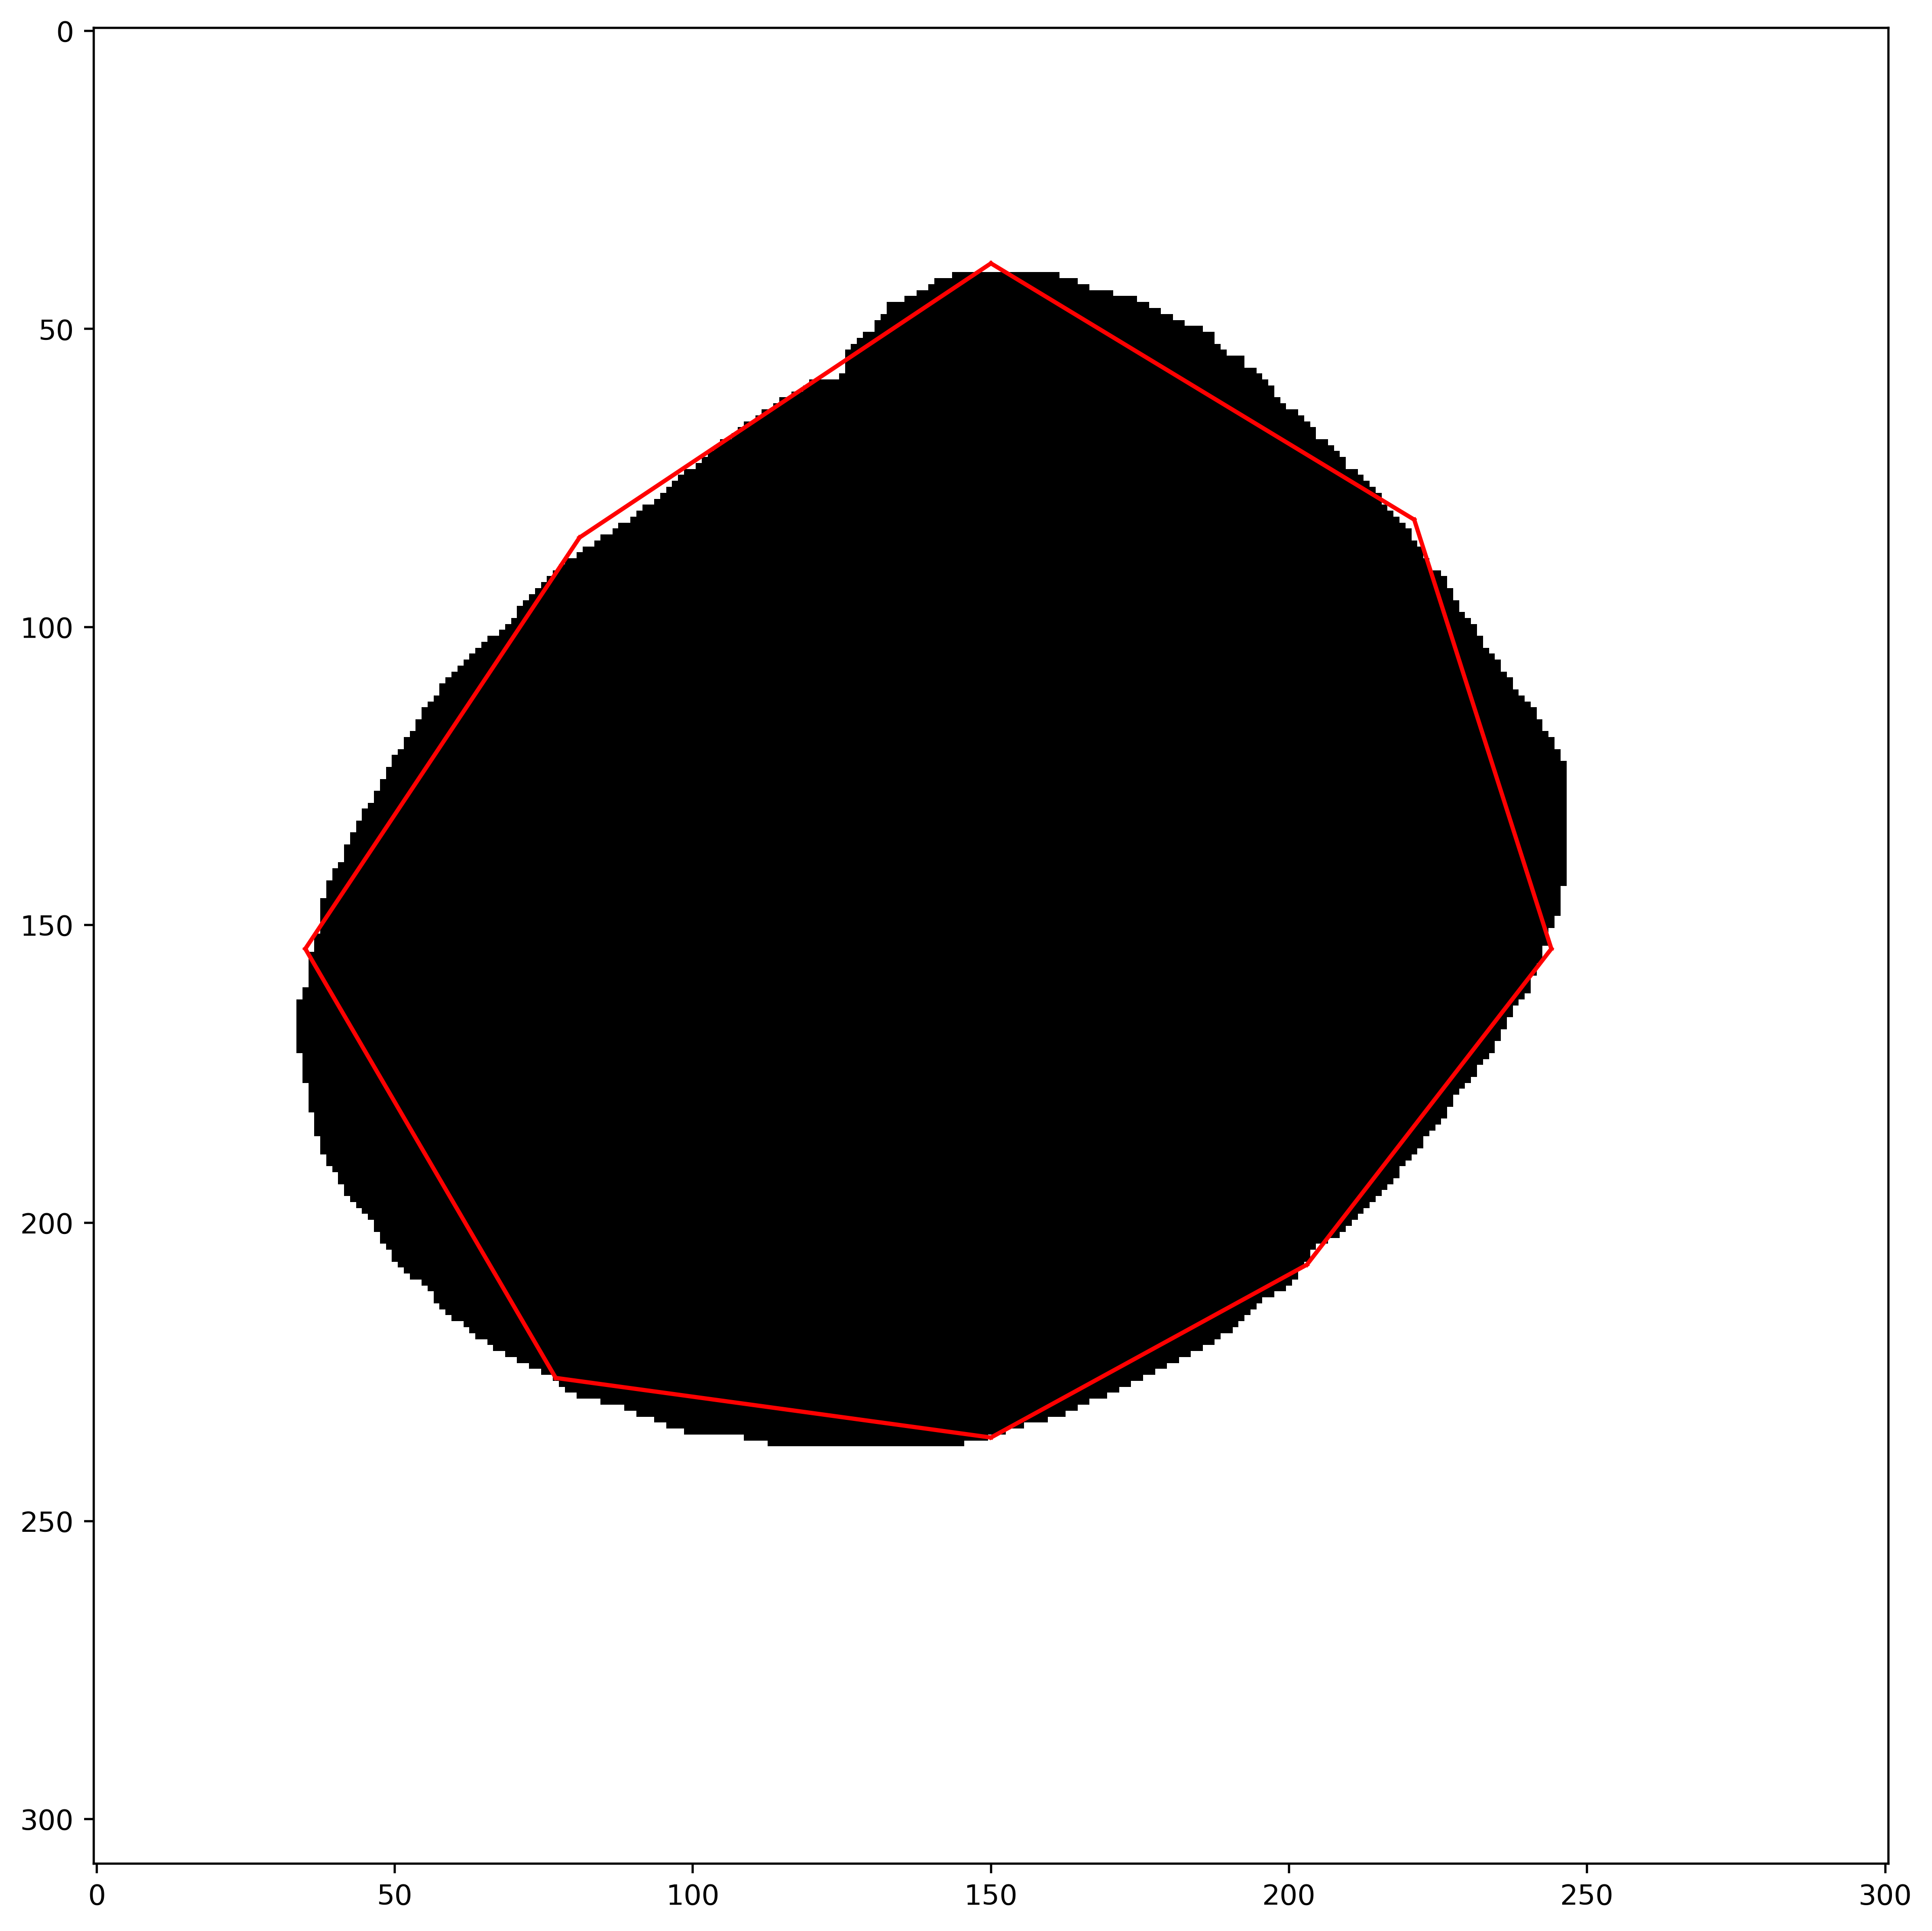

In [69]:
res = cv2.imread('spot.png', cv2.IMREAD_COLOR) # здесь будет сегментрованное изображение

n = int(input()) # кол-во прямых-направлений
points = np.zeros((n * 2, 2)) # массив для координат точек, которые мы будем соединять

for i in range(n):
    alpha = i * math.pi / n # угол направления с горизонталью
    gradient, coordinates = grad_by_direction(alpha, grad_img)
    size = gradient.size

    # будем искать локальные максимумы по условию: градиент в данной точке больше, чем в предыдущей
    # хотя бы на 50 и больше, чем в следующей хотя бы на 50
    first = 0
    last = 0
    for j in range(1, size - 2):
        if gradient[j] > (gradient[j-1] + 50) or gradient[j] > (gradient[j+1] + 50):
            if first > 0:
                last = j
            else:
                first = j
                
    # i-я точка
    points[i, 1] = int(coordinates[0, first])
    points[i, 0] = int(coordinates[1, first])
    # n+i-я точка
    points[n + i, 1] = int(coordinates[0, last])
    points[n + i, 0] = int(coordinates[1, last])
    

hull = ConvexHull(points)
plt.figure(figsize=(18, 12), dpi=400)
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'r')
    
plt.imshow(res)